# Lecture05 Python for Data Visualization

There are many data visualization libraries to make charts and graphs in Python.  The oldest and probably the most powerful of these is Matplotlib.  It has many options to control the creation of charts, but it is also one of the most complex libraries to use to make charts.  We will spend much of this session on learning how to use Matplotlib, and then switch to exploring data visualization with a different Python library, Seaborn.

Objectives for today's session:

* Learn how to use Matplotlib to make basic charts:
    * Line charts
    * Histograms
    * Scatterplots
* Learn how to add titles, and labels for X and Y axes
* Learn how to control the styling of the charts
* Learn how to create a composite figure with subplots
* Learn how to export figures to png to use elsewhere

* Introduce Seaborn charting library

In addition, we will explore U.S. Census data and Craigslist rentals to visualize them.


## Visualizing Census Data

Here we load US Census Block data to set up some initial analysis and data visualization. Below are the tables pulled from Summary File 1 (SF1) for Census Blocks in the San Francisco Bay Area.

In [6]:
#!python3 -m pip install tables

In [5]:
import pandas as pd

sf1store = pd.HDFStore('data/bay_sf1_small.h5')
sf1 = sf1store['sf1_extract']
print(sf1[:5])
print(sf1.shape)

/Users/qzhao/opt/anaconda3/envs/py3122026/lib/python3.12/site-packages/pandas/compat/pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)


   logrecno        blockfips state county   tract  blkgrp block  arealand  \
0        25  060014271001000    06    001  427100       1  1000         0   
1        26  060014271001001    06    001  427100       1  1001     79696   
2        27  060014271001002    06    001  427100       1  1002       739   
3        28  060014271001003    06    001  427100       1  1003     19546   
4        29  060014271001004    06    001  427100       1  1004     14364   

   P0010001  P0020001  ...  H0040003  H0040004  H0050001  H0050002  H0050003  \
0         0         0  ...         0         0         0         0         0   
1       113       113  ...         1         4         0         0         0   
2         0         0  ...         0         0         0         0         0   
3        29        29  ...         0         7         3         0         0   
4        26        26  ...         0         6         0         0         0   

   H0050004  H0050005  H0050006  H0050007  H0050008  
0 

Let's calculate some basic information about each census block in the Bay Area.

In [7]:
SQ_METERS_TO_SQ_MILES = 2589988

sf1['pct_rent'] = sf1['H0040004'] / sf1['H0040001'] * 100
sf1['pct_black'] = sf1['P0030003'] / sf1['P0030001'] * 100
sf1['pct_asian'] = sf1['P0030005'] / sf1['P0030001'] * 100
sf1['pct_white'] = sf1['P0030002'] / sf1['P0030001'] * 100
sf1['pct_hisp'] = sf1['P0040003'] / sf1['P0040001'] * 100
sf1['pct_vacant'] = sf1['H0050001'] / sf1['H00010001'] * 100
sf1['pop_sqmi'] = sf1['P0010001'] / (sf1['arealand'] / SQ_METERS_TO_SQ_MILES)
# What does this line mean?
sf1 = sf1[sf1['P0030001']>0]

print(sf1.head(10))
print(sf1.shape)

    logrecno        blockfips state county   tract  blkgrp block  arealand  \
1         26  060014271001001    06    001  427100       1  1001     79696   
3         28  060014271001003    06    001  427100       1  1003     19546   
4         29  060014271001004    06    001  427100       1  1004     14364   
6         31  060014271001006    06    001  427100       1  1006      1281   
7         32  060014271001007    06    001  427100       1  1007     19020   
10        35  060014271001010    06    001  427100       1  1010     17285   
11        36  060014271001011    06    001  427100       1  1011      1344   
13        38  060014271001013    06    001  427100       1  1013     12109   
16        41  060014271001016    06    001  427100       1  1016     10556   
18        43  060014271001018    06    001  427100       1  1018     23910   

    P0010001  P0020001  ...  H0050006  H0050007  H0050008    pct_rent  \
1        113       113  ...         0         0         0   80.00000

In [8]:
sf1.describe()

,logrecno,blkgrp,arealand,P0010001,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,...,H0050006,H0050007,H0050008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,pop_sqmi
count,68797.000000,68797.000000,6.879700e+04,68797.000000,68797.000000,68797.0,68797.0,68797.0,68797.0,68797.000000,...,68797.000000,68797.000000,68797.000000,68200.000000,68797.000000,68797.000000,68797.000000,68797.000000,68209.000000,6.879700e+04
mean,404141.990552,2.138146,1.842772e+05,103.939692,103.939692,0.0,0.0,0.0,0.0,103.939692,...,0.416617,0.002675,0.612309,33.686597,6.113801,18.683807,59.628902,20.663419,5.896477,1.115862e+04
std,299752.023748,1.136372,1.707375e+06,142.419653,142.419653,0.0,0.0,0.0,0.0,142.419653,...,2.879630,0.096414,2.022353,30.819961,13.202340,22.181204,28.189146,22.434874,9.319408,2.073782e+04
min,26.000000,1.000000,7.600000e+01,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.959760e-01
25%,46514.000000,1.000000,1.214600e+04,31.000000,31.000000,0.0,0.0,0.0,0.0,31.000000,...,0.000000,0.000000,0.000000,10.000000,0.000000,1.030928,37.606838,4.072398,0.000000,4.061415e+03
50%,592917.000000,2.000000,2.031000e+04,66.000000,66.000000,0.0,0.0,0.0,0.0,66.000000,...,0.000000,0.000000,0.000000,22.950820,0.000000,10.465116,63.076923,12.871287,3.263403,8.157075e+03
75%,658809.000000,3.000000,4.325300e+04,125.000000,125.000000,0.0,0.0,0.0,0.0,125.000000,...,0.000000,0.000000,1.000000,50.943396,5.714286,27.659574,83.333333,29.870130,7.692308,1.323492e+04
max,721989.000000,7.000000,2.774832e+08,5115.000000,5115.000000,0.0,0.0,0.0,0.0,5115.000000,...,246.000000,17.000000,205.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.172735e+06


In [9]:
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

## Basic Graphs With Matplotlib

Matplotlib is the oldest and most widely used of the charting libraries for Python, and integrates seamlessly into Jupyter notebooks.  Making simple charts of all kinds is very straightforward.  Matplotlib also has a tremendous number of options that enable a user to carefully control the appearance of charts.  This power is one of Matplotlib's best and worst features, at the same time.  Using those options is complicated. You may see very fancy figures in **Nature** or **Science** publication and most of them are made by Matplotlib if the authors program in Python.

A very simple way to start your visualization is to explore the Matplotlib gallery:
https://matplotlib.org/stable/gallery/index.html

Financial times also provides a very useful visual vocabulary and you can check here: https://github.com/Financial-Times/chart-doctor/tree/main/visual-vocabulary

Here we will stick to basic plots that Matplotlib makes easy, and then switch to a newer charting library that handles both simple and more complex charts well.

The first example is a chart showing that you can use Numpy methods like sort to create a revealing line graph showing in this case how few census blocks have a relatively large numbers of people in them.

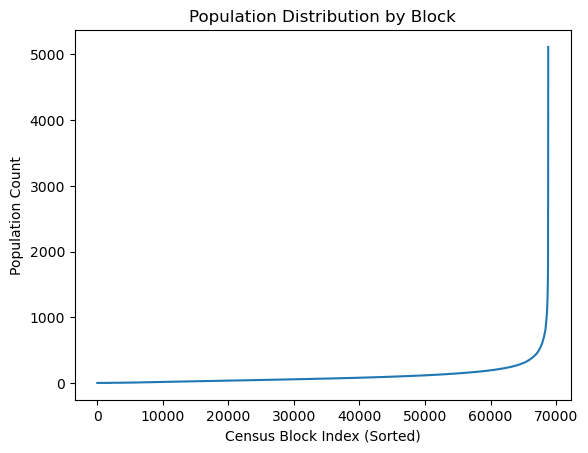

In [11]:
plt.plot(np.sort(sf1['P0010001']))
plt.xlabel('Census Block Index (Sorted)')
plt.ylabel('Population Count')
plt.title('Population Distribution by Block')
plt.show()

Next we look at a cumulative sum of population across blocks.  The order they are added is based on the order they have in the DataFrame, so this is somewhat arbitrary.

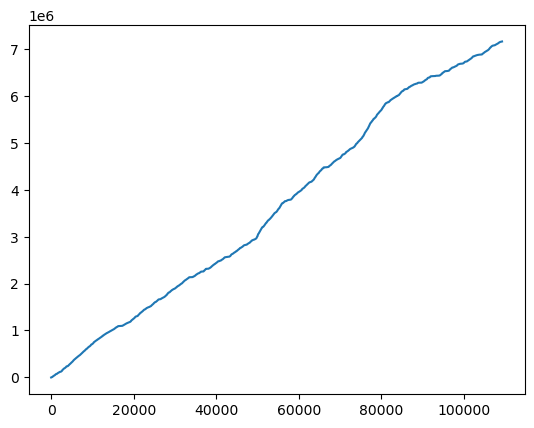

In [12]:
plt.plot(np.cumsum(sf1['P0010001']))
plt.show()

Combining the sort and cumulative sum methods makes this look more interesting.

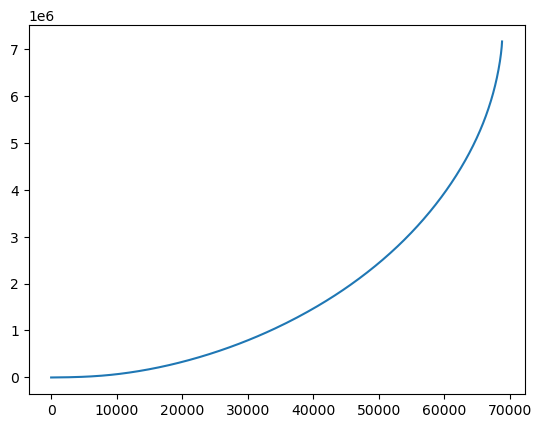

In [13]:
plt.plot(np.cumsum(np.sort(sf1['P0010001'])))
plt.show()

As we have seen before, simple histograms are also easy to produce.  Here is the same population data displayed as a histogram. You can control things like the number of bins, or the color, easily.

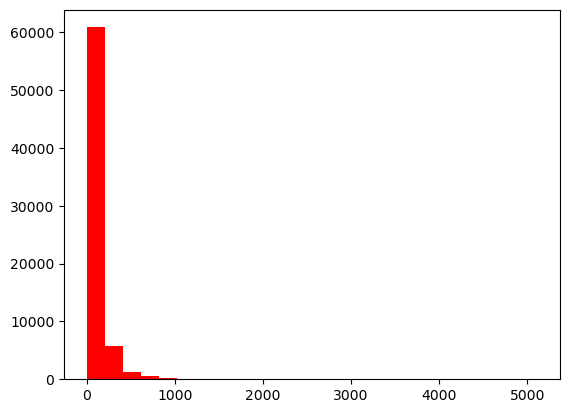

In [14]:
plt.hist(sf1['P0010001'], bins=25, color='red')
plt.show()

The distribution of population seems to be very skewed, with most blocks having relatively small population counts.  To zoom in to those and get a better sense of the distribution we might slice the blocks to isolate those below the long tail of the distribution.  Let's plot the distribution again after truncating the top one percent.  Increasing the number of bins provides greater detail as well.  We can see that 99% of the blocks have less than 700 people, and that there are still a significant number of blocks with only a few people in them.

687.0399999999936
(68109, 49)


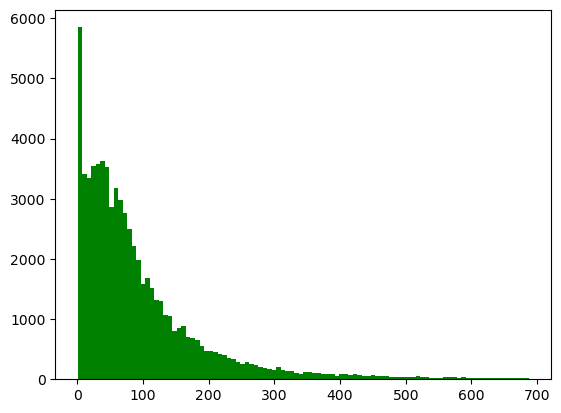

In [15]:
print(sf1['P0010001'].quantile(.99))
small_pop = sf1[sf1['P0010001'] < sf1['P0010001'].quantile(.99)]
print(small_pop.shape)
plt.hist(small_pop['P0010001'], bins=100, color='green')
plt.show()

### Exploring Racial and Ethnic Concentration in the Bay Area

Let's use the population by race and ethnicity to explore the spatial concentration of people of different races and ethnicities in the Bay Area.  First, compute a regional percentage to use as a frame of reference for the block-level profiles. 

In [16]:
print('Regional Pct White: '+"{0:.1f}%".format(sf1['P0030002'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Black: '+"{0:.1f}%".format(sf1['P0030003'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Asian: '+"{0:.1f}%".format(sf1['P0030005'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Hispanic: '+"{0:.1f}%".format(sf1['P0040003'].sum()/sf1['P0040001'].sum()*100))
print('Note that these add up to more than 100% since Hispanic is not broken out by race in this calculation')

Regional Pct White: 52.5%
Regional Pct Black: 6.7%
Regional Pct Asian: 23.3%
Regional Pct Hispanic: 23.5%
Note that these add up to more than 100% since Hispanic is not broken out by race in this calculation


Now create a statistical profile and generate histograms of the distribution of each of these population groups.  What kinds of descriptive conclusions could you draw about how they differ from each other?

count    68797.000000
mean        18.683807
std         22.181204
min          0.000000
25%          1.030928
50%         10.465116
75%         27.659574
max        100.000000
Name: pct_asian, dtype: float64


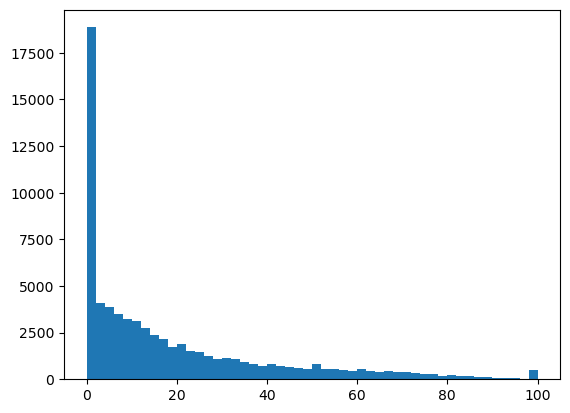

In [17]:
print(sf1['pct_asian'].describe())
plt.hist(sf1['pct_asian'], bins=50)
plt.show()

count    68797.000000
mean        20.663419
std         22.434874
min          0.000000
25%          4.072398
50%         12.871287
75%         29.870130
max        100.000000
Name: pct_hisp, dtype: float64


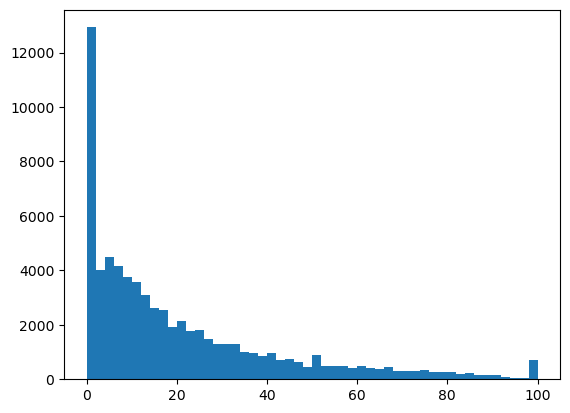

In [18]:
print(sf1['pct_hisp'].describe())
plt.hist(sf1['pct_hisp'], bins=50)
plt.show()

count    68797.000000
mean         6.113801
std         13.202340
min          0.000000
25%          0.000000
50%          0.000000
75%          5.714286
max        100.000000
Name: pct_black, dtype: float64


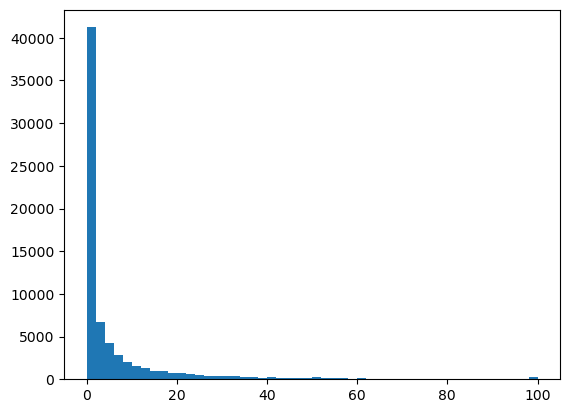

In [19]:
print(sf1['pct_black'].describe())
plt.hist(sf1['pct_black'], bins=50)
plt.show()

count    68797.000000
mean        59.628902
std         28.189146
min          0.000000
25%         37.606838
50%         63.076923
75%         83.333333
max        100.000000
Name: pct_white, dtype: float64


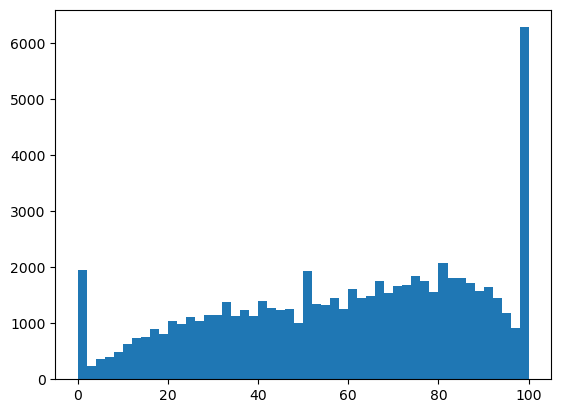

In [20]:
print(sf1['pct_white'].describe())
plt.hist(sf1['pct_white'], bins=50)
plt.show()

To make figures easier to compare side-by-side, Matplotlib enables creating a composite figure using subplots.

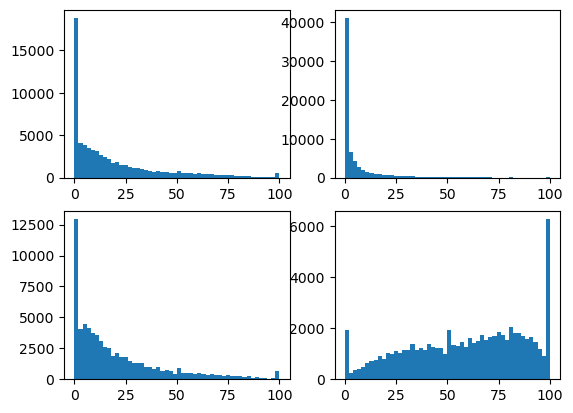

In [21]:
plt.figure(1)
plt.subplot(221)
plt.hist(sf1['pct_asian'], bins=50)

plt.subplot(222)
plt.hist(sf1['pct_black'], bins=50)

plt.subplot(223)
plt.hist(sf1['pct_hisp'], bins=50)

plt.subplot(224)
plt.hist(sf1['pct_white'], bins=50)

plt.show()

The figures by default are a bit too small, and now it would really help to add some titles and legends to make this easier to read.

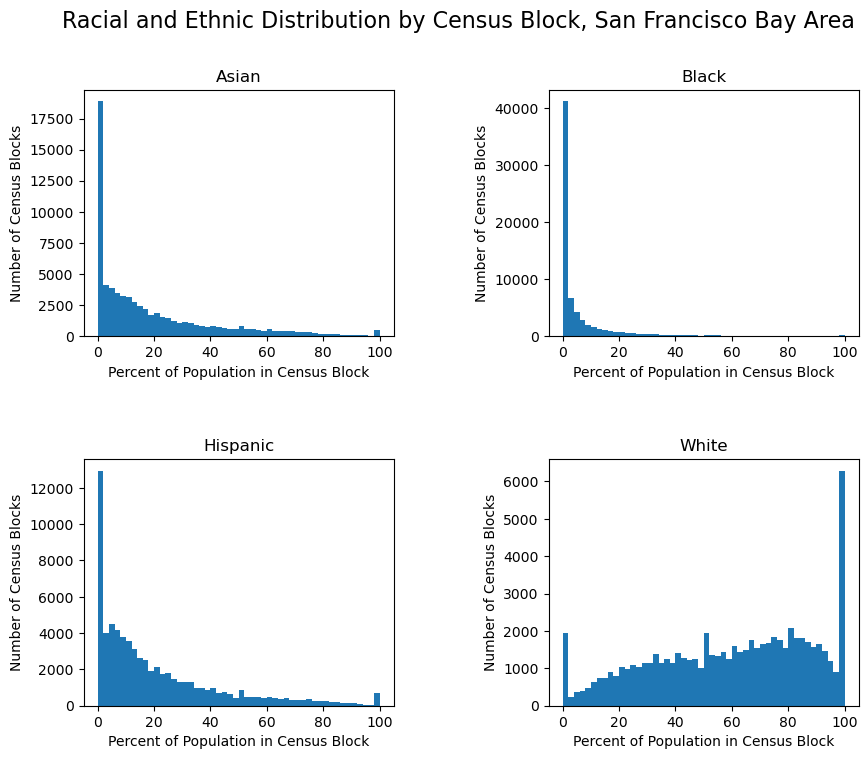

In [22]:
plt.figure(1, figsize=(10,8))
plt.suptitle("Racial and Ethnic Distribution by Census Block, San Francisco Bay Area", fontsize=16)

ax = plt.subplot(221)
ax.set_title("Asian")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_asian'], bins=50)

ax = plt.subplot(222)
ax.set_title("Black")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_black'], bins=50)

ax = plt.subplot(223)
ax.set_title("Hispanic")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_hisp'], bins=50)

ax = plt.subplot(224)
ax.set_title("White")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_white'], bins=50)

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

But notice that the y axis scales are different for each subplot?  That makes direct comparisons potentially distorted by the difference in the scales.  Below we add consistent scales for the y axis on each subplot through **set_ylim**.

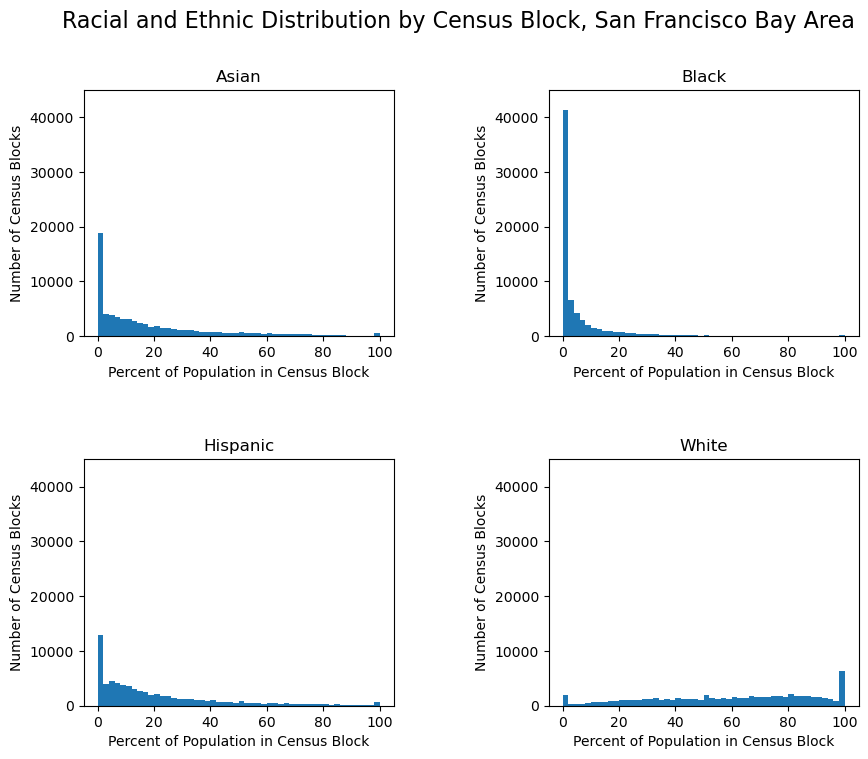

In [23]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("Racial and Ethnic Distribution by Census Block, San Francisco Bay Area", fontsize=16)

ax = plt.subplot(221)
ax.set_title("Asian")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_asian'], bins=50)

ax = plt.subplot(222)
ax.set_title("Black")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_black'], bins=50)

ax = plt.subplot(223)
ax.set_title("Hispanic")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_hisp'], bins=50)

ax = plt.subplot(224)
ax.set_title("White")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_white'], bins=50)

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

Finally, a bit more tweaking of the plots, changing the color and edgecolor of the bars, and decreasing the alpha (opacity) of the bars.  And here we save the figure to a png file at a specified dpi.

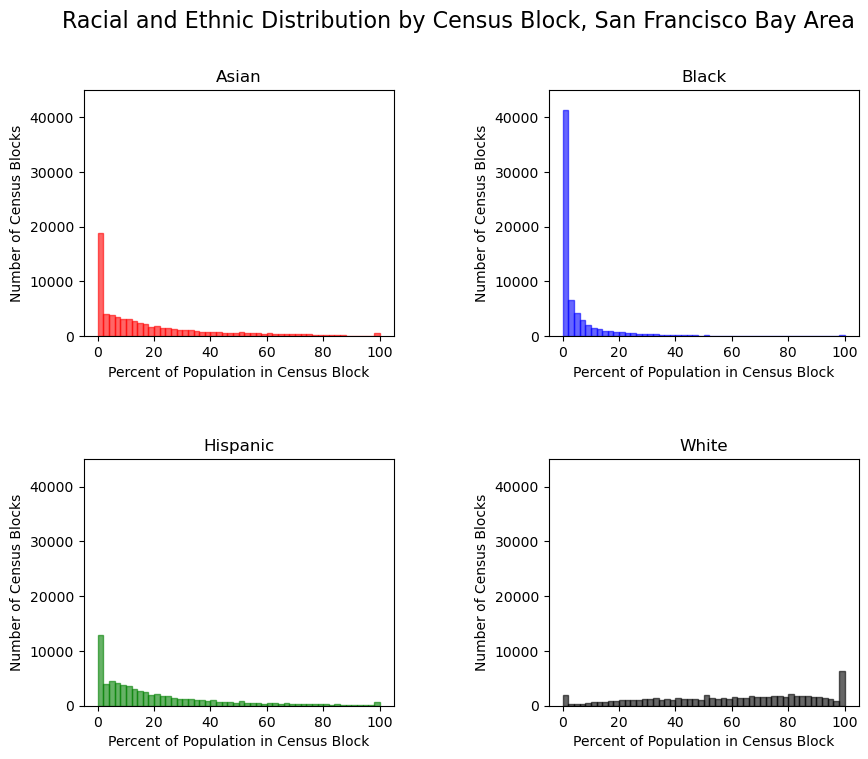

In [24]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("Racial and Ethnic Distribution by Census Block, San Francisco Bay Area", fontsize=16)

ax = plt.subplot(221)
ax.set_title("Asian")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_asian'], bins=50, alpha=.6, color='r', edgecolor='r')

ax = plt.subplot(222)
ax.set_title("Black")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_black'], bins=50, alpha=.6, color='b', edgecolor='b')

ax = plt.subplot(223)
ax.set_title("Hispanic")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_hisp'], bins=50, alpha=.6, color='g', edgecolor='g')

ax = plt.subplot(224)
ax.set_title("White")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_white'], bins=50, alpha=.6, color='k', edgecolor='k')

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.savefig("racial_distributuon_bay_area.tif",dpi=300)
plt.show()


You might be curious what is **plt** and **ax** in the previous code block, feel free to explore this blog for more information: https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9 

In Matplotlib, plt and ax are often used to refer to different parts of the plotting process:

**plt**: This typically refers to the matplotlib.pyplot module, which provides a MATLAB-like interface for creating plots and visualizations. When you import Matplotlib with import matplotlib.pyplot as plt, you are essentially importing the pyplot module and aliasing it as plt. This aliasing is done for convenience and brevity, as it allows you to access Matplotlib's plotting functions using plt as a prefix.

**ax**: This typically refers to an Axes object within a Matplotlib figure. An Axes object is what you think of as an individual plot. It contains most of the elements that make up a plot: the x-axis, y-axis, lines, markers, etc. By working directly with Axes objects, you have more fine-grained control over the properties of your plot.


In general **plt** is just the acronym of matplotlib.pyplot, and **ax** is very useful when we want to draw subplots.


## Visualizing Craigslist Data

Next we read Craigslist rental listings for the San Francisco Bay Area - over 70,000 listings scraped during 2014,  cleaned, and reverse geocoded to attach a Census Block ID that we can use to merge with census data.

Similar data exist in the UBDC data service from Zoopla (licensed needed): https://data.ubdc.ac.uk/datasets/be951b83-df1f-4a10-bc11-7c8840a4a514

In [25]:
rentals = pd.read_csv('data/sfbay_geocoded.csv', dtype={'fips_block': str})
rentals = rentals.iloc[:,2:]
print(rentals.head())
print(rentals.shape)
print(rentals['rent'].describe())
print(rentals['sqft'].describe())

          pid        date region              neighborhood    rent  bedrooms  \
0  4465937146  2014-05-11  sfbay  twin peaks / diamond hts  4500.0       2.0   
1  4446270486  2014-05-11  sfbay                 sunnyvale  2650.0       2.0   
2  4465913377  2014-05-11  sfbay                 glen park  3100.0       2.0   
3  4465933497  2014-05-11  sfbay              redwood city  1850.0       1.0   
4  4465926659  2014-05-11  sfbay              walnut creek  1325.0       1.0   

     sqft  rent_sqft  rent_sqft_cat   longitude   latitude         county  \
0  1200.0   3.750000              5 -122.438300  37.745000  San Francisco   
1  1040.0   2.548077              5 -122.008131  37.353699    Santa Clara   
2  1000.0   3.100000              5 -122.439743  37.731584  San Francisco   
3   792.0   2.335859              5 -122.234294  37.491715      San Mateo   
4   642.0   2.063863              5 -122.087751  37.923448   Contra Costa   

        fips_block state  
0  060750216002015    CA  
1 

### Univariate Distributions: Histograms

Histograms are useful for plotting the distribution of a variable for a larger number of observations.  Bar plots are really bad for large numbers of observations as some of you have already encountered... The advantage of histograms is that they allow you to aggregate large numbers of observations into counts by interval.

Start by creating a default histogram of rents.

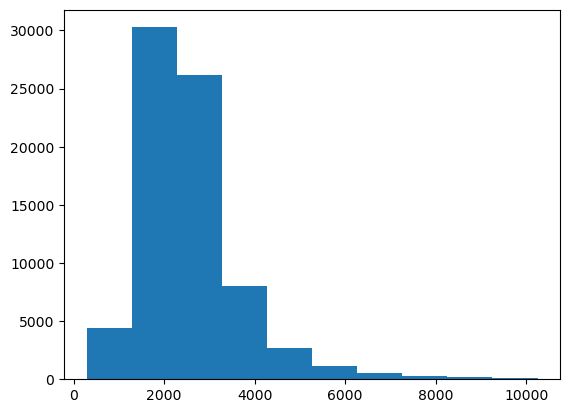

In [26]:
plt.hist(rentals['rent'])
plt.show()

Now make it look nicer, adding titles, axis labels, and setting the color and alpha.

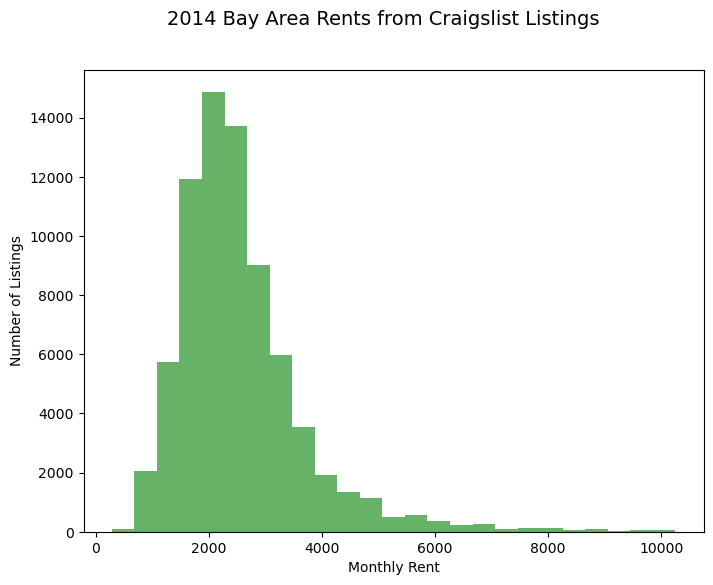

In [27]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
plt.xlabel('Monthly Rent')
plt.ylabel('Number of Listings')
ax = plt.hist(rentals['rent'], bins=25, alpha=.6, color='g')
plt.show()

### Bivariate distributions: Scatter Plots

When you want to examine a large number of observations and explore the way two variables are related to each other, a scatter plot is often the first tool used to visualize the relationships.

Now lets look at generating a scatter plot between two variables -- sqft and rent.

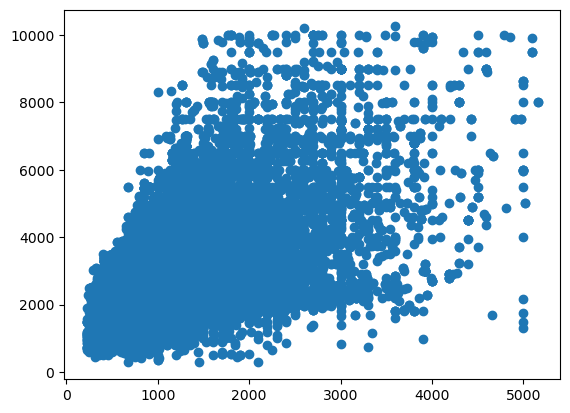

In [28]:
plt.scatter(rentals['sqft'], rentals['rent'])

And a somewhat nicer version:

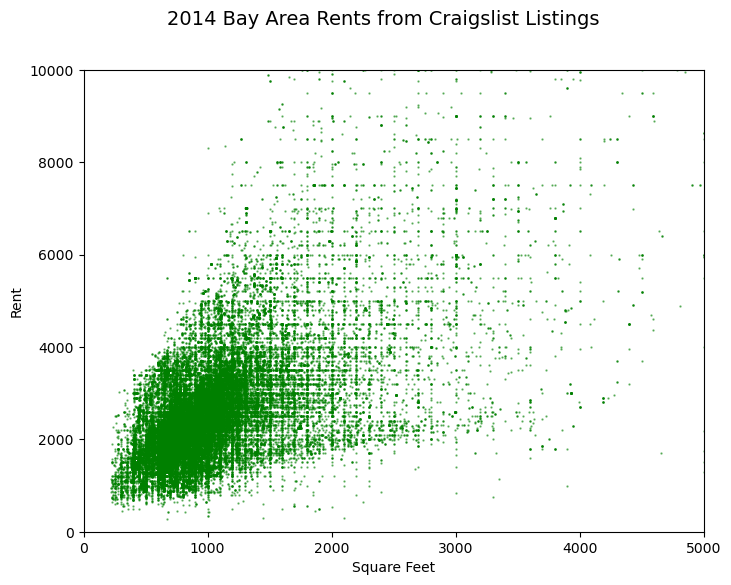

In [29]:
plt.figure(1, figsize=(8,6))
plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
plt.xlabel('Square Feet')
plt.ylabel('Rent')
plt.xlim(0,5000)
plt.ylim(0,10000)
# s: marker size
ax = plt.scatter(rentals['sqft'], rentals['rent'], color='g', alpha=.5, edgecolor='g', s=.5)
plt.show()

### Bivariare Distributions with an Ordinal Variable

In some cases one of your two variables may not be continuous, like sqft or rent. It may be categorical, or qualitative -- like County, or it may be ordinal, like number of bedrooms.

Let's look at a scatter plot of rents against number of bedrooms.

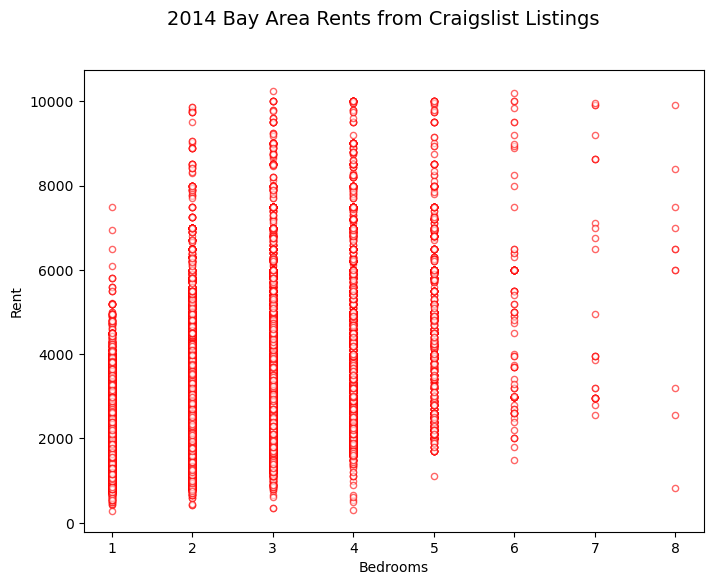

In [30]:
plt.figure(1, figsize=(8,6))
plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
plt.xlabel('Bedrooms')
plt.ylabel('Rent')
ax = plt.scatter(rentals['bedrooms'], rentals['rent'], color='w', edgecolor='r', alpha=.6, s=20)
plt.show()

This gives a very different view of the data than the usual scatterplot of two continuous variables.

Note though that both of the scatterplots suffer from a visual problem that can make interpretation problematic: overplotting.  It is hard to know how many points are actually being plotted when they are overplotted like this.

### Add County names 

In [31]:
county_names = {'001': 'Alameda', '013': 'Contra Costa', '041': 'Marin', '055': 'Napa', '075': 'San Francisco',
                '081': 'San Mateo', '085': 'Santa Clara', '095': 'Solano', '097': 'Sonoma'}
sf1.insert(4, 'county_name', sf1['county'].replace(county_names))
sf1[:5]

,logrecno,blockfips,state,county,county_name,tract,blkgrp,block,arealand,P0010001,...,H0050006,H0050007,H0050008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,pop_sqmi
1,26,060014271001001,06,001,Alameda,427100,1,1001,79696,113,...,0,0,0,80.000000,13.274336,5.309735,78.761062,1.769912,0.000000,3672.312839
3,28,060014271001003,06,001,Alameda,427100,1,1003,19546,29,...,0,0,2,70.000000,13.793103,27.586207,37.931034,24.137931,23.076923,3842.712166
4,29,060014271001004,06,001,Alameda,427100,1,1004,14364,26,...,0,0,0,75.000000,0.000000,38.461538,34.615385,0.000000,0.000000,4688.087441
6,31,060014271001006,06,001,Alameda,427100,1,1006,1281,2,...,0,0,0,100.000000,0.000000,50.000000,0.000000,100.000000,0.000000,4043.697112
7,32,060014271001007,06,001,Alameda,427100,1,1007,19020,30,...,0,0,0,33.333333,0.000000,43.333333,50.000000,0.000000,10.000000,4085.154574


### Let's merge SF1 and Rentals to explore the data


In [32]:
rentals_sf1 = pd.merge(rentals, sf1, left_on='fips_block', right_on='blockfips')
rentals_sf1[:10]

,pid,date,region,neighborhood,rent,bedrooms,sqft,rent_sqft,rent_sqft_cat,longitude,...,H0050006,H0050007,H0050008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,pop_sqmi
0,4465937146,2014-05-11,sfbay,twin peaks / diamond hts,4500.0,2.0,1200.0,3.750000,5,-122.438300,...,3,0,5,88.888889,23.445826,10.301954,46.358792,23.268206,5.882353,24936.524053
1,4446270486,2014-05-11,sfbay,sunnyvale,2650.0,2.0,1040.0,2.548077,5,-122.008131,...,0,0,0,39.240506,3.105590,47.204969,39.751553,7.453416,3.658537,31935.978249
2,4465913377,2014-05-11,sfbay,glen park,3100.0,2.0,1000.0,3.100000,5,-122.439743,...,0,0,4,57.627119,7.042254,20.422535,58.450704,9.859155,6.349206,22322.062151
3,4465933497,2014-05-11,sfbay,redwood city,1850.0,1.0,792.0,2.335859,5,-122.234294,...,0,0,0,93.939394,2.000000,8.000000,41.000000,68.000000,8.333333,25972.603289
4,4465926659,2014-05-11,sfbay,walnut creek,1325.0,1.0,642.0,2.063863,5,-122.087751,...,0,0,1,8.333333,0.000000,13.793103,86.206897,3.448276,7.692308,1123.084602
5,4465931519,2014-05-11,sfbay,danville / san ramon,2880.0,3.0,1404.0,2.051282,5,-121.919467,...,0,0,1,41.237113,7.296137,24.463519,59.656652,11.158798,3.000000,32992.575802
6,4465927473,2014-05-11,sfbay,"hercules, pinole, san pablo, el sob",1750.0,2.0,1025.0,1.707317,4,-122.284580,...,0,0,0,21.518987,26.035503,21.893491,42.603550,21.301775,5.952381,14937.309217
7,4465908569,2014-05-11,sfbay,Belmont,9000.0,3.0,3000.0,3.000000,5,-122.281523,...,1,0,0,10.989011,2.928870,27.615063,64.016736,3.765690,2.150538,5998.014883
8,4465927237,2014-05-11,sfbay,willow glen / cambrian,2590.0,2.0,1250.0,2.072000,5,-121.881117,...,0,0,0,47.826087,5.263158,5.263158,59.649123,35.087719,0.000000,7146.350857
9,4465925108,2014-05-11,sfbay,mountain view,2000.0,2.0,1000.0,2.000000,5,-122.078273,...,0,0,1,13.333333,0.000000,13.836478,79.245283,3.144654,3.225806,8920.739380


In [33]:
rentals_sf1.columns

Index(['pid', 'date', 'region', 'neighborhood', 'rent', 'bedrooms', 'sqft',
       'rent_sqft', 'rent_sqft_cat', 'longitude', 'latitude', 'county_x',
       'fips_block', 'state_x', 'logrecno', 'blockfips', 'state_y', 'county_y',
       'county_name', 'tract', 'blkgrp', 'block', 'arealand', 'P0010001',
       'P0020001', 'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006',
       'P0030001', 'P0030002', 'P0030003', 'P0030004', 'P0030005', 'P0030006',
       'P0030007', 'P0030008', 'P0040001', 'P0040002', 'P0040003', 'H00010001',
       'H0030001', 'H0030002', 'H0030003', 'H0040001', 'H0040002', 'H0040003',
       'H0040004', 'H0050001', 'H0050002', 'H0050003', 'H0050004', 'H0050005',
       'H0050006', 'H0050007', 'H0050008', 'pct_rent', 'pct_black',
       'pct_asian', 'pct_white', 'pct_hisp', 'pct_vacant', 'pop_sqmi'],
      dtype='object')

### Bar plots 

Bar plots work well for small numbers of observations that numeric values by a qualitative variable, like rents by county

<Axes: xlabel='county_name'>

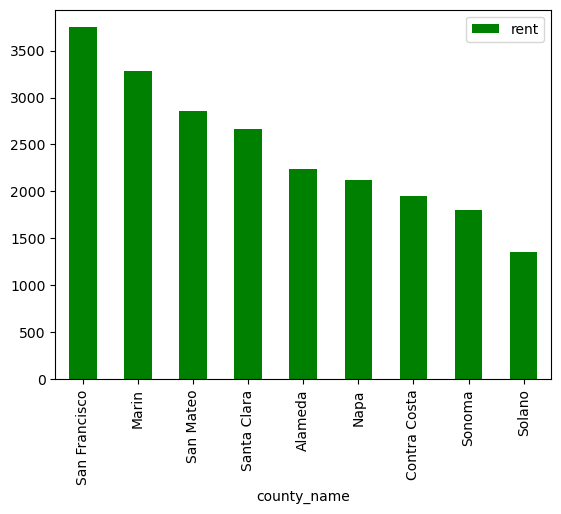

In [34]:
# How we actually calculate county_rents here?
county_rents = rentals_sf1.groupby(rentals_sf1['county_name'])[['rent']].mean().sort_values(by='rent', ascending=False)
county_rents.plot(kind='bar', color='g')

In [35]:
county_rents.reset_index(inplace=True)
county_rents

,county_name,rent
0,San Francisco,3746.737974
1,Marin,3277.287562
2,San Mateo,2857.011248
3,Santa Clara,2665.584276
4,Alameda,2235.584293
5,Napa,2117.797398
6,Contra Costa,1955.075348
7,Sonoma,1805.140760
8,Solano,1359.965551


## Improving on Matplotlib: Seaborn

From the introductory notes on the Seaborn site at https://seaborn.pydata.org/tutorial/introduction

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are

* Several built-in themes for styling matplotlib graphics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

In [36]:
#!pip install seaborn

In [37]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/qzhao/opt/anaconda3/envs/py3122026/lib/python3.12/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [38]:
import seaborn as sns
#sns.set(color_codes=True)
sns.set()

<Axes: xlabel='county_name', ylabel='rent'>

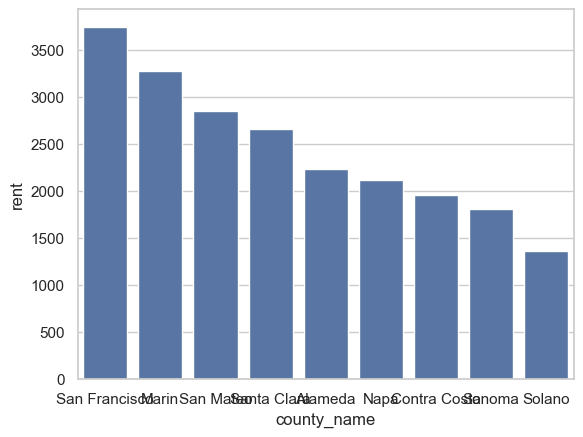

In [39]:
sns.set_style("whitegrid")
sns.barplot(x="county_name", y="rent", data=county_rents)

We could improve on this a bit more by adding better axis labels, a title, and rotating the county names.

When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses the hls color space, which is a simple transformation of RGB values.  Notice the palette option below.

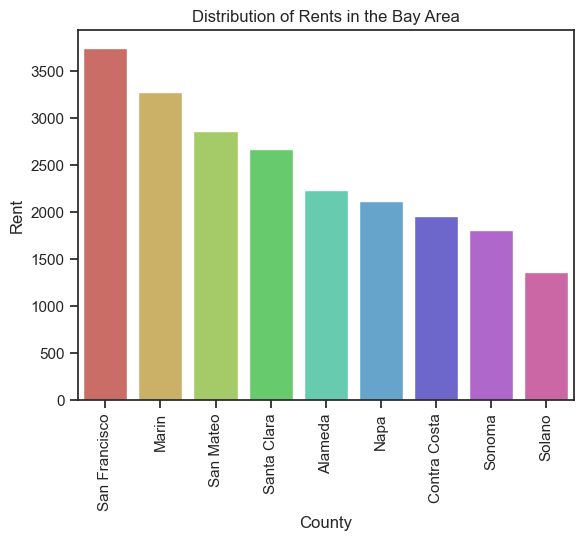

In [40]:
sns.set_style("ticks")
ax = sns.barplot(x="county_name", y="rent", data=county_rents, hue = "county_name", palette=sns.color_palette("hls", 9), legend = False)
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Rent')
ax.set_xlabel('County')
# Here is the method to rotate the tick labels
for item in ax.get_xticklabels():
    item.set_rotation(90)

There is also the hls_palette() function that lets you control the lightness and saturation of the colors.


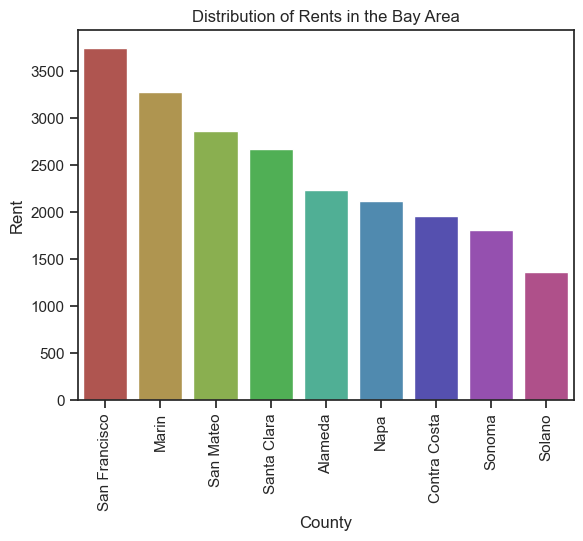

In [41]:
sns.set_style("ticks")
# You can change the lightness and saturation by setting up l and s values. 
ax = sns.barplot(x="county_name", y="rent", data=county_rents, hue = "county_name", palette=sns.hls_palette(9, l=.5, s=.5), legend = False)
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Rent')
ax.set_xlabel('County')
for item in ax.get_xticklabels():
    item.set_rotation(90)

However, because of the way the human visual system works, colors that are even “intensity” in terms of their RGB levels won’t necessarily look equally intense. We perceive yellows and greens as relatively brighter and blues as relatively darker, which can be a problem when aiming for uniformity with the hls system.

To remedy this, seaborn provides an interface to the husl system, which also makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.

You can always go to colorbrew and explore the most comfortable colors for your visualization: https://colorbrewer2.org



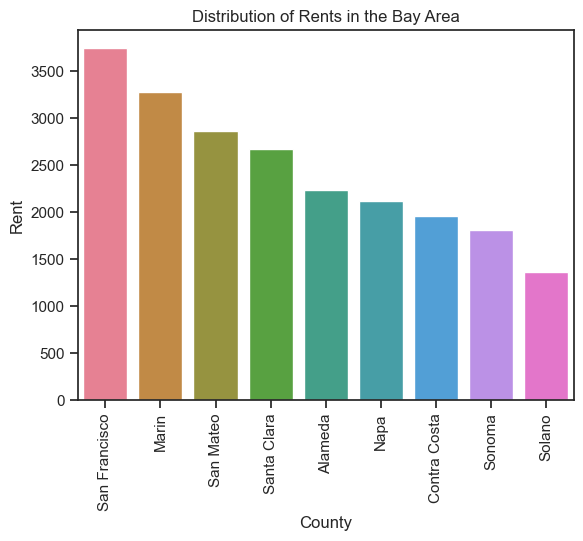

In [42]:
sns.set_style("ticks")
ax = sns.barplot(x="county_name", y="rent", data=county_rents, hue = "county_name", palette=sns.color_palette("husl", 9), legend = False)
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Rent')
ax.set_xlabel('County')
for item in ax.get_xticklabels():
    item.set_rotation(90)

### Visualizing Univariate Distributions

The plot below uses the rental data we plotted using a standard hist method of Pandas above, but uses the Seaborn *distplot* method instead.  This plots a histogram, normalized so that the bars area of the bars sum to 1, and superimposses a KDE plot.  KDE stands for Kernel Density Estimate, which provides a smoothed function that has the same property as the normalized histogram: the area under the curve sums to 1. Think of it as though it is a normalized histogram with a really large number of bars, and smoothed.  

This gives a good view of the distribution of the data where the y axis is a proportion of the data that is within each x-axis interval.

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/3221763288.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rentals['rent'])


<Axes: xlabel='rent', ylabel='Density'>

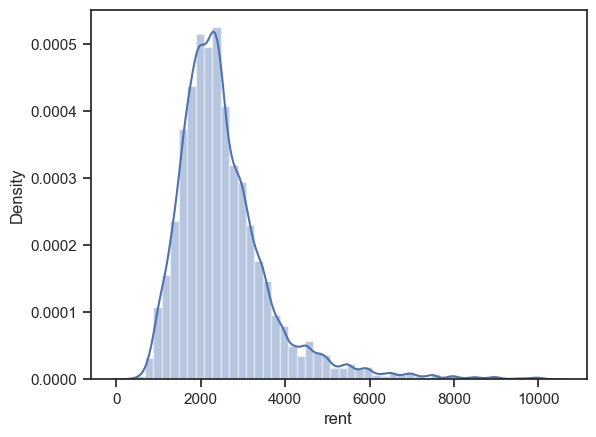

In [43]:
sns.distplot(rentals['rent'])

<Axes: xlabel='rent', ylabel='Density'>

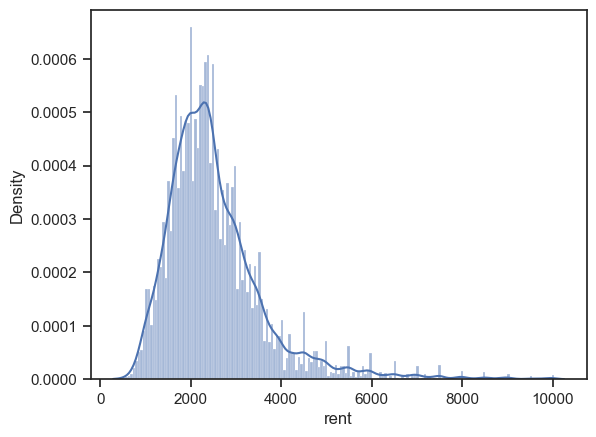

In [44]:
sns.histplot(rentals['rent'], kde=True, stat="density")

If you want just the histogram component of this like before, but with nicer aesthetics like the grid, just suppress the kde plot.  You can also specify the numbe of bins, etc.

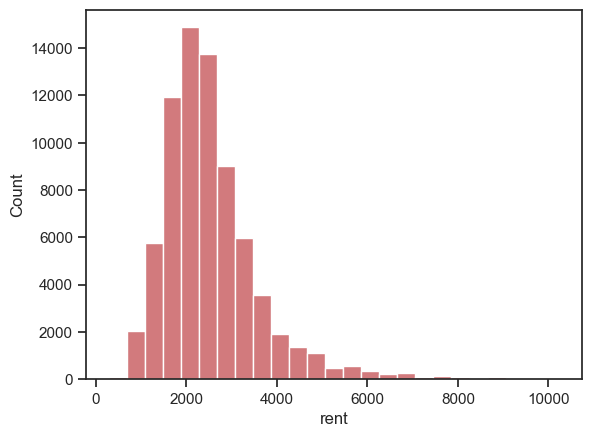

In [45]:
sns.histplot(rentals['rent'], bins=25, color='r', kde=False);

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/3601324122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rentals['rent'], kde_kws={"color": "k", "lw": 2, "label": "KDE"}, bins=25, color='g')


<Axes: xlabel='rent', ylabel='Density'>

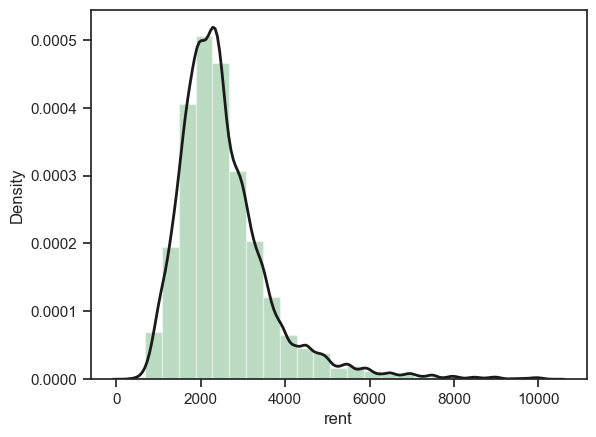

In [46]:
sns.distplot(rentals['rent'], kde_kws={"color": "k", "lw": 2, "label": "KDE"}, bins=25, color='g')

Are our rents normally distributed?  We can superimpose a plot of a normal distribution fit to our data using a norm method of the Scipy stats library to visually inspect this.

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/21864273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rentals['rent'], fit=norm, kde=False)


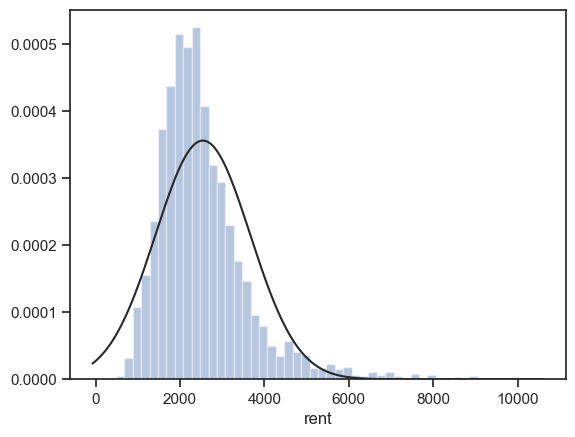

In [47]:
from scipy.stats import norm
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/4019225083.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rentals['rent'], bins=25, fit=norm, kde=False)


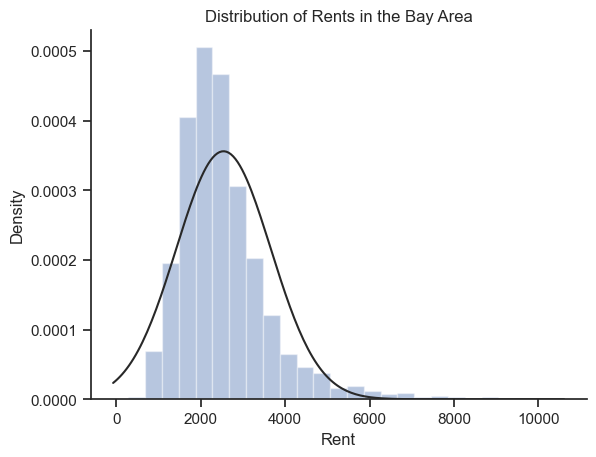

In [48]:
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], bins=25, fit=norm, kde=False)
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Density')
ax.set_xlabel('Rent')
# Remove the top and right spines from despine(). 
# You don't see the black lines in the top and right positions anymore.
sns.despine()

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/2887479541.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rentals['rent'], fit=norm, kde=False)


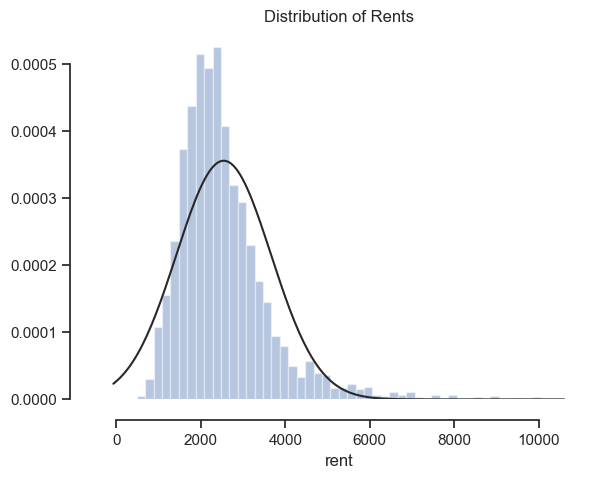

In [50]:
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
# You can offset and trim the axis and make it look better. 
sns.despine(offset=15, trim=True)

### Context presets

Seaborn comes with four preset 'contexts' for graphs, which alter the graphical elements to be optimized for incuding in a *paper*, or using in a *talk*, or in a *notebook*, or printing on a *poster*.

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/3490749361.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rentals['rent'], fit=norm, kde=False)


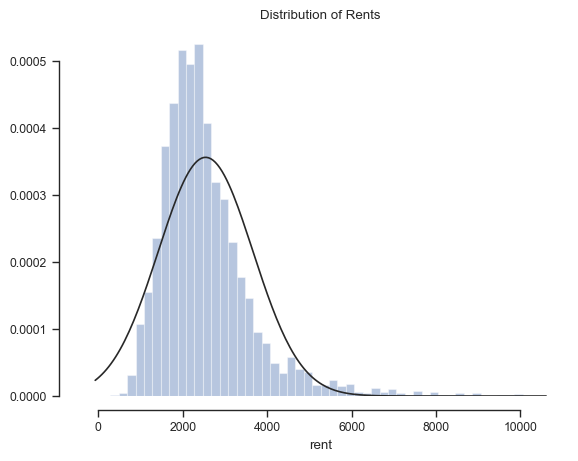

In [51]:
sns.set_context("paper")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/1545905407.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rentals['rent'], fit=norm, kde=False)


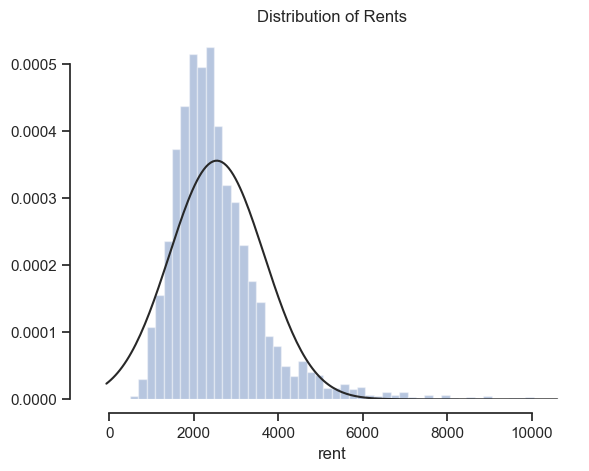

In [52]:
sns.set_context("notebook")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/4013013966.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rentals['rent'], fit=norm, kde=False)


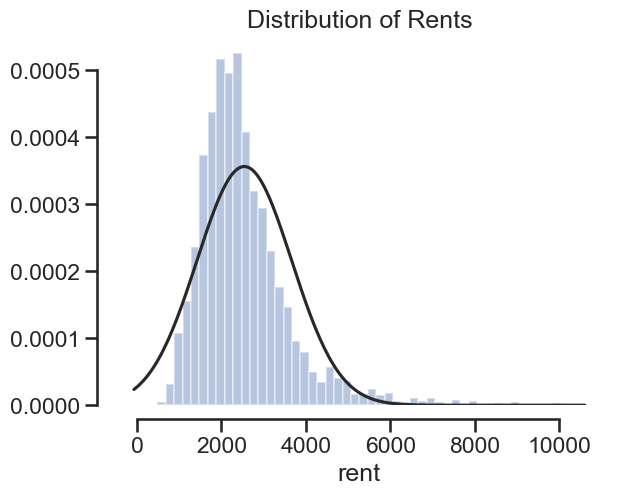

In [53]:
sns.set_context("talk")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/679652010.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rentals['rent'], fit=norm, kde=False)


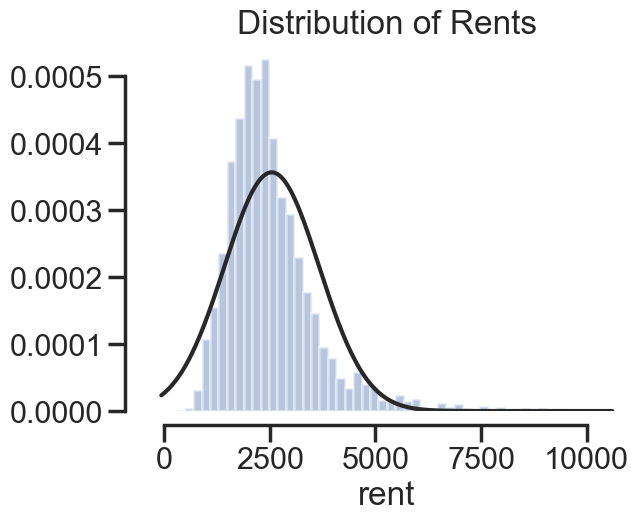

In [54]:
sns.set_context("poster")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

### Dealing with Overplotting Issues

Recall the discussion of overplotting and how difficult it is to understand the distribution of data when data are overplotted. Let's revisit that and look at some options for addressing it.

First we look at the bivariate distribution with an ordinal variable and a continuous one.

In [55]:
# Let's set the context back to notebook
sns.set_context("notebook")

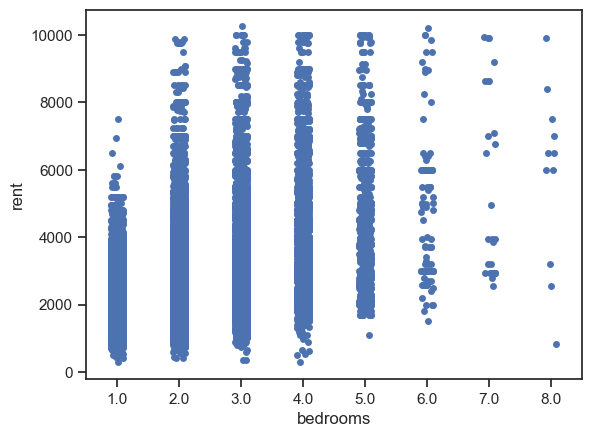

In [56]:
sns.stripplot(x="bedrooms", y="rent", data=rentals);

Jitter is something we can use, here is the parameter explanation: https://seaborn.pydata.org/generated/seaborn.stripplot.html

This can be useful when you have many points and they overlap, so that it is easier to see the distribution. 
You can specify the amount of jitter (half the width of the uniform random variable support), or just use True for a good default.

<Axes: xlabel='bedrooms', ylabel='rent'>

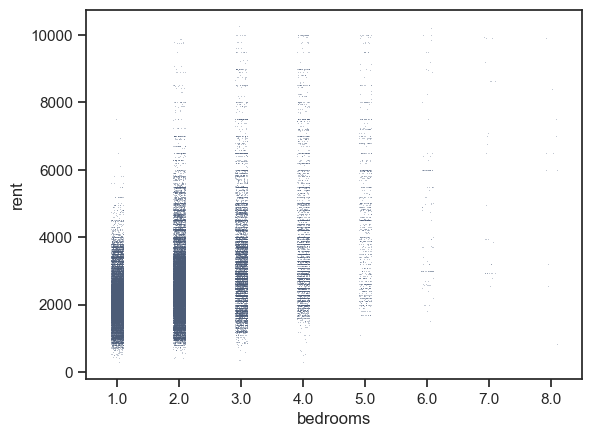

In [57]:
sns.stripplot(x="bedrooms", y="rent", data=rentals, jitter=True, size=0.5, alpha=.5)

In [58]:
rentals.shape

(73863, 14)

/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/3545837520.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =  sns.stripplot(x="bedrooms", y="rent", data=rentals,
/var/folders/4h/m4wxtk6x2v78kzl8pqqnfdnc0000gp/T/ipykernel_3481/3545837520.py:1: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax =  sns.stripplot(x="bedrooms", y="rent", data=rentals,


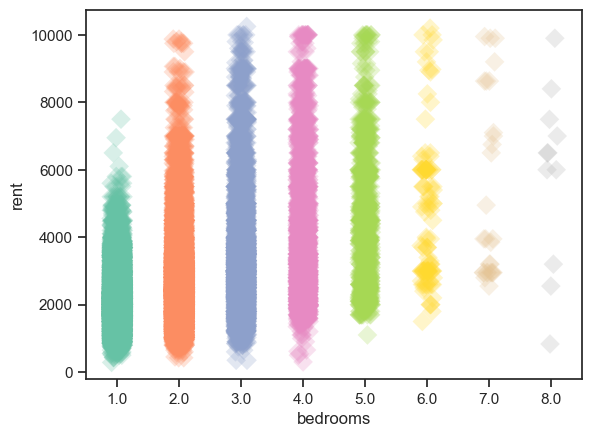

In [59]:
ax =  sns.stripplot(x="bedrooms", y="rent", data=rentals,
                   palette="Set2", size=10, marker="D",
                   edgecolor="gray", alpha=.25)

<Axes: xlabel='bedrooms', ylabel='rent'>

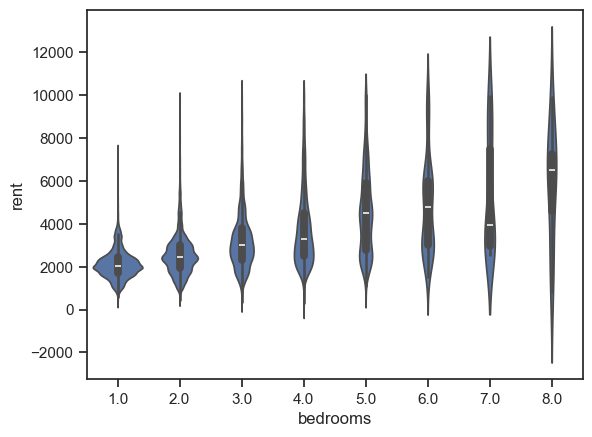

In [60]:
sns.violinplot(x="bedrooms", y="rent", data=rentals)

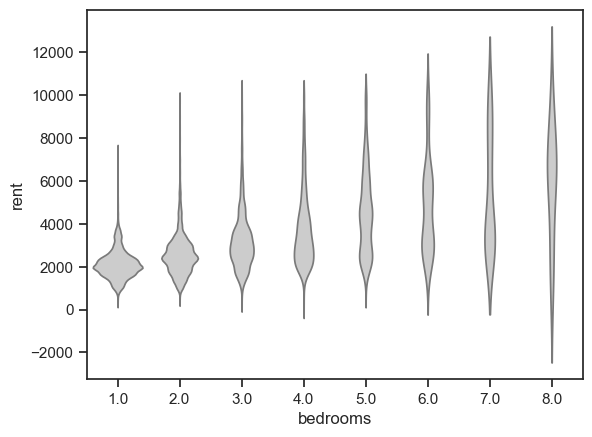

In [61]:
# Using ax to overlap figures
ax = sns.violinplot(x="bedrooms", y="rent", data=rentals,
                    inner=None, color=".8")

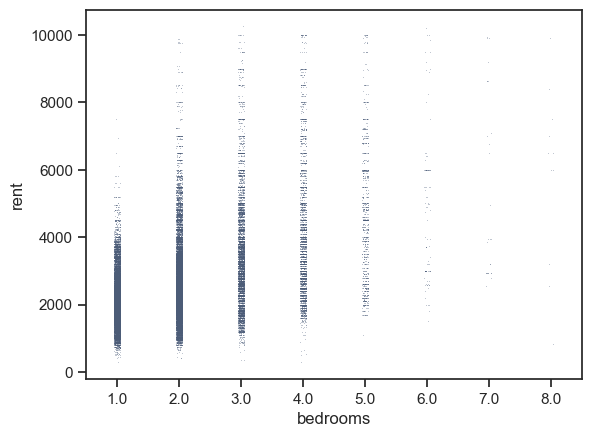

In [62]:
ax = sns.stripplot(x="bedrooms", y="rent", data=rentals, jitter=0.05, size=0.5, alpha=.5)

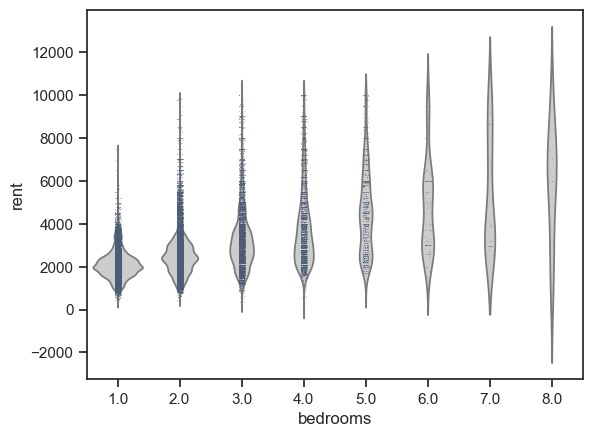

In [63]:
# What happen if we put them together?
ax = sns.violinplot(x="bedrooms", y="rent", data=rentals,
                    inner=None, color=".8")
ax = sns.stripplot(x="bedrooms", y="rent", data=rentals, jitter=0.05, size=0.5, alpha=.5)

<Axes: xlabel='bedrooms', ylabel='rent'>

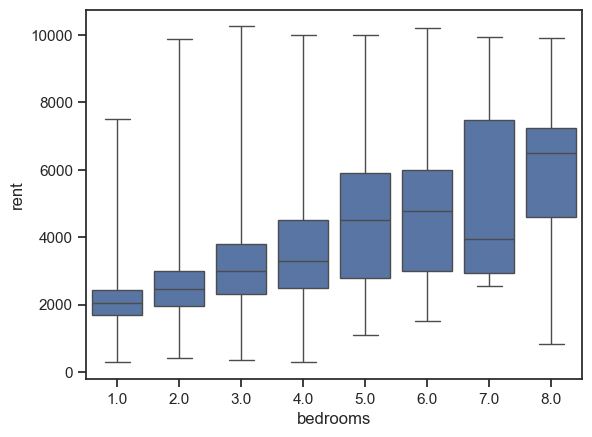

In [64]:
sns.boxplot(x="bedrooms", y="rent", data=rentals, whis=np.inf)

Now we look at a bivariate distribution with two continuous variables.

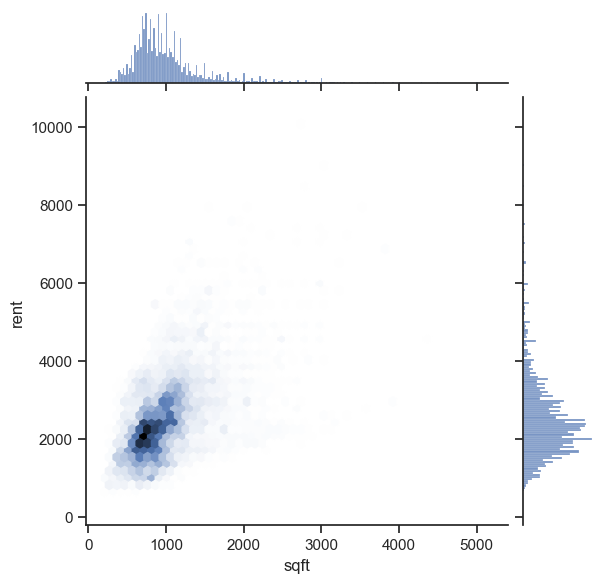

In [65]:
sns.jointplot(x="sqft", y="rent", kind="hex", data=rentals);

In [66]:
rentals2 = rentals[(rentals['rent']<5000) & (rentals['sqft']>500) & (rentals['sqft']<1500)]

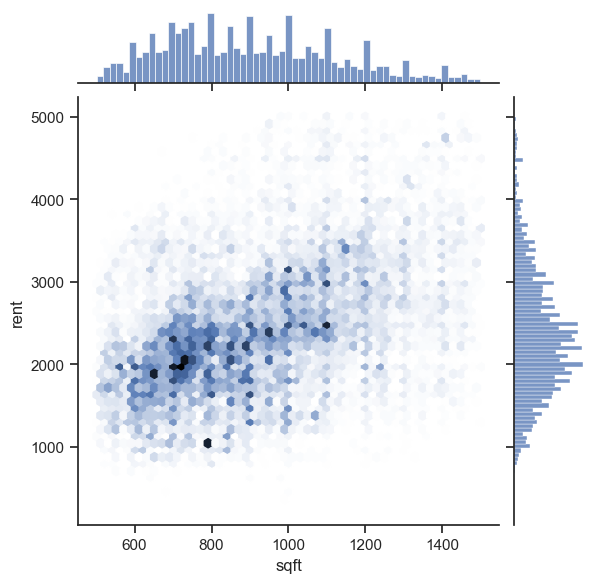

In [67]:
sns.jointplot(x="sqft", y="rent", kind="hex", data=rentals2);

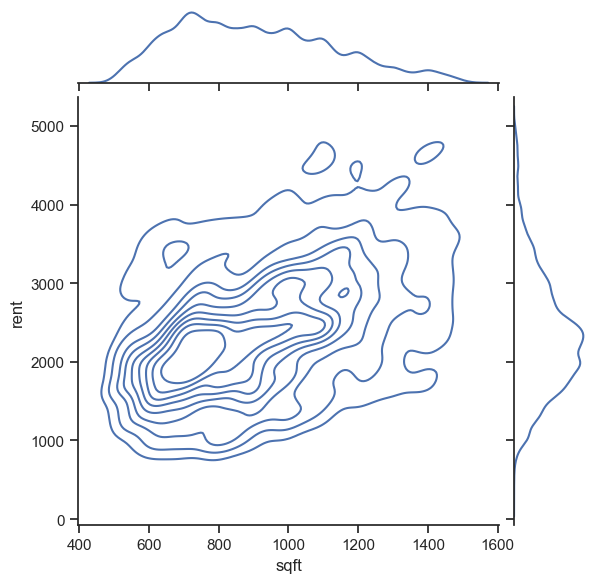

In [68]:
sns.jointplot(x="sqft", y="rent", kind="kde", data=rentals2);

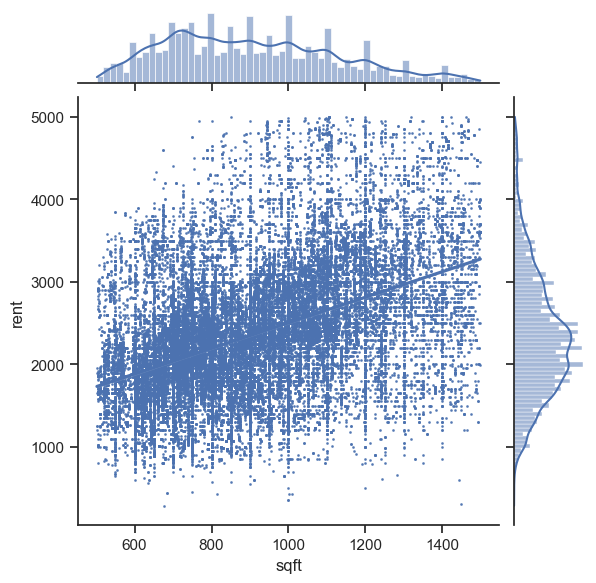

In [69]:
g = sns.jointplot(x = "sqft", y = "rent", data=rentals2, kind="reg", scatter_kws={"s": 1})
